# Customer Churn Analysis (EDA)

## 1. Problem Statement

The objective of this analysis is to identify key factors influencing customer churn and provide actionable business recommendations to improve customer retention.


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [41]:
df = pd.read_csv(r"C:\Users\Prasanna\OneDrive\Desktop\python project\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [42]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 2. Data Cleaning


In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape


(7043, 21)

In [44]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [46]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df.drop('customerID', axis=1, inplace=True)


In [47]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [48]:
df.dropna(inplace=True)


In [49]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


## 3. Target Distribution


In [50]:
df['Churn'].value_counts(normalize=True)*100


Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

In [56]:
churn_rate = df['Churn'].mean()*100
print("Overall Churn Rate:", round(churn_rate,2), "%")


Overall Churn Rate: 26.58 %


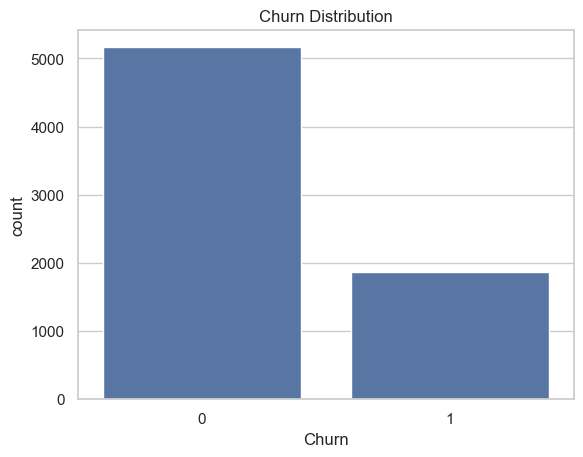

In [51]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


Around 26–27% customers have churned.

This indicates a significant retention problem.

## 4. Univariate Analysis


In [52]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


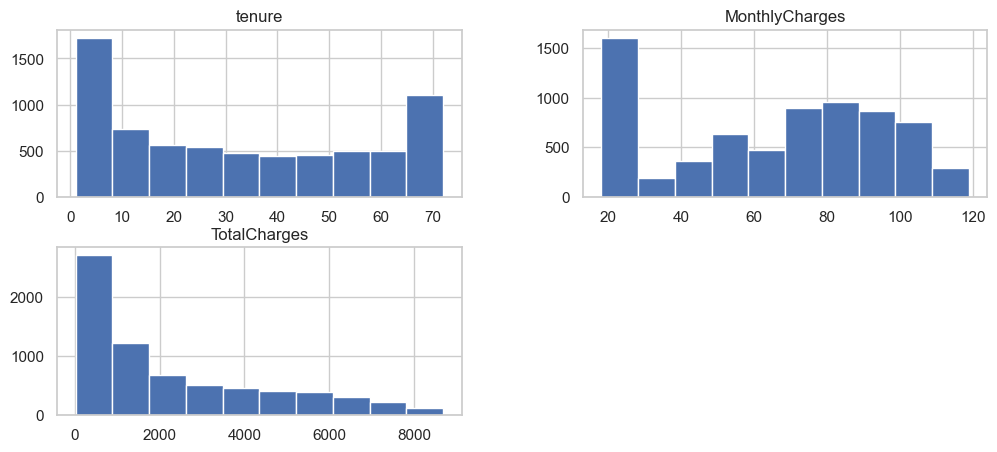

In [53]:
df[['tenure','MonthlyCharges','TotalCharges']].hist(figsize=(12,5))
plt.show()


Tenure shows many new customers.

Monthly charges vary widely.

Total charges depend on tenure.

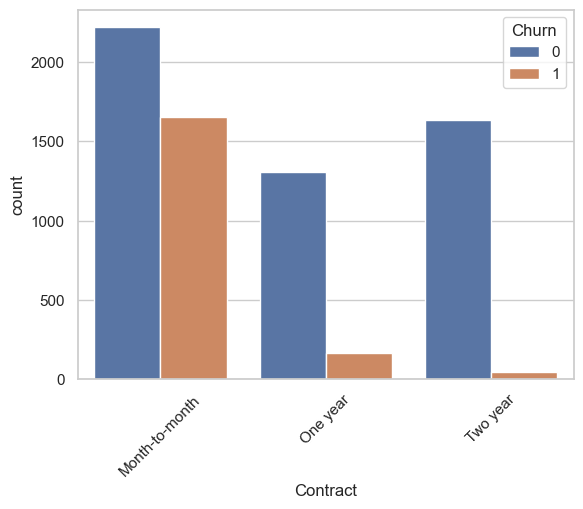

In [54]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.show()


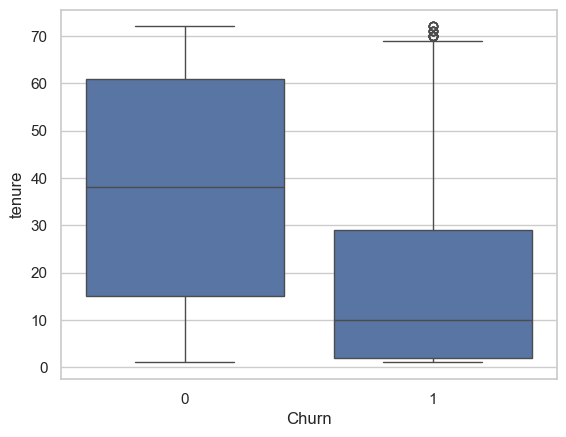

In [55]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


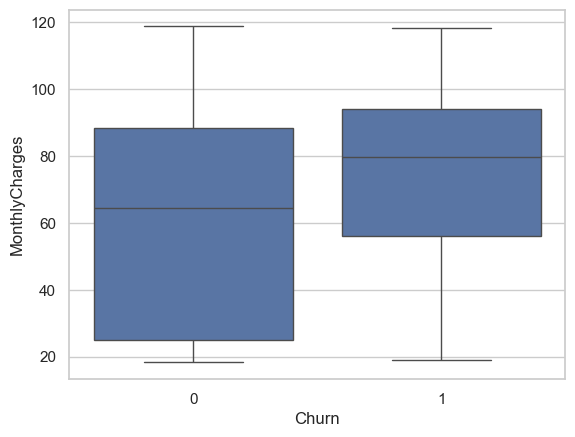

In [57]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

In [27]:
for col in df.select_dtypes(include='object').columns:
    print("\n", col)
    print(df[col].value_counts())



 customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64

 gender
gender
Male      3549
Female    3483
Name: count, dtype: int64

 Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64

 Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

 PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

 MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

 InternetService
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

 OnlineSecurity
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

 OnlineBackup
OnlineBackup
No                     3087
Yes                

## 5. Bivariate Analysis


In [62]:
contract_churn = df.groupby('Contract')['Churn'].mean() * 100
contract_churn.sort_values(ascending=False)

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64

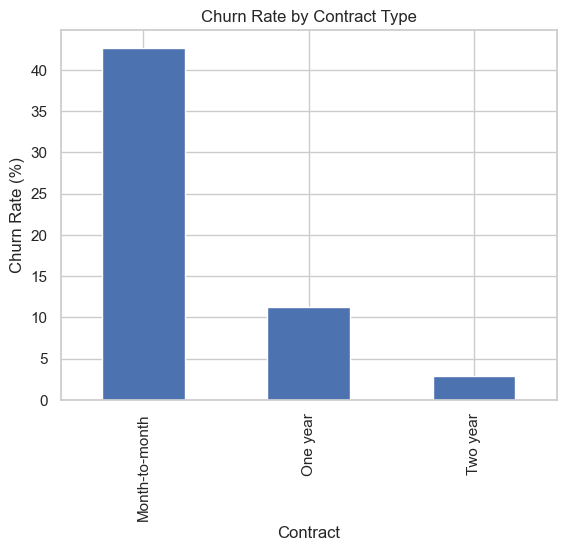

In [28]:
contract_churn = df.groupby('Contract')['Churn'].mean()*100
contract_churn.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.show()


Customers with Month-to-month contracts show the highest churn rate.

Customers with One-year contracts have moderate churn.

Customers with Two-year contracts show the lowest churn rate.

This indicates that longer contract commitments significantly reduce churn risk.

Month-to-month customers have highest churn.


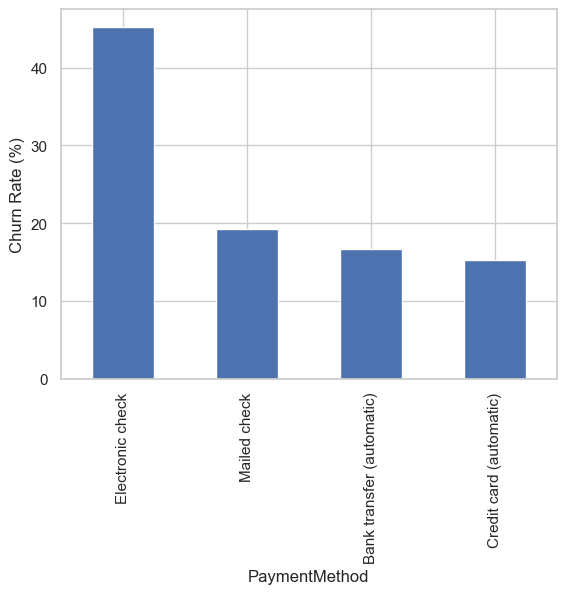

In [64]:
payment_churn = df.groupby('PaymentMethod')['Churn'].mean()*100
payment_churn.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Churn Rate (%)")
plt.show()

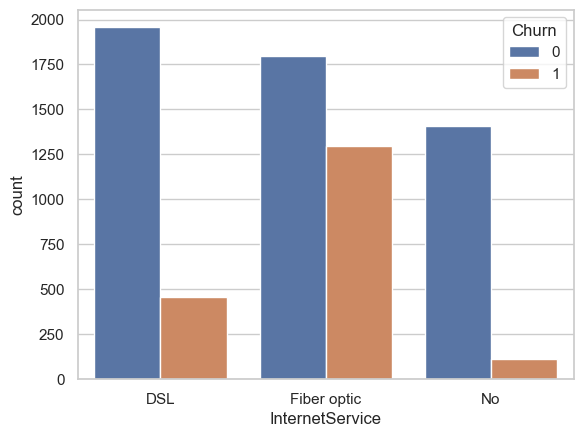

In [58]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

C:\Users\Prasanna\AppData\Local\Temp\ipykernel_55624\2824436907.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].mean()*100


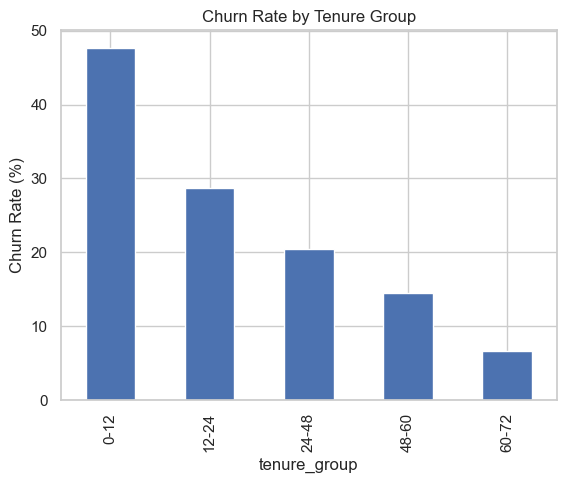

In [29]:
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0,12,24,48,60,72],
                            labels=["0-12","12-24","24-48","48-60","60-72"])

tenure_churn = df.groupby('tenure_group')['Churn'].mean()*100
tenure_churn.plot(kind='bar')
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Tenure Group")
plt.show()


Customers in first 12 months churn most.

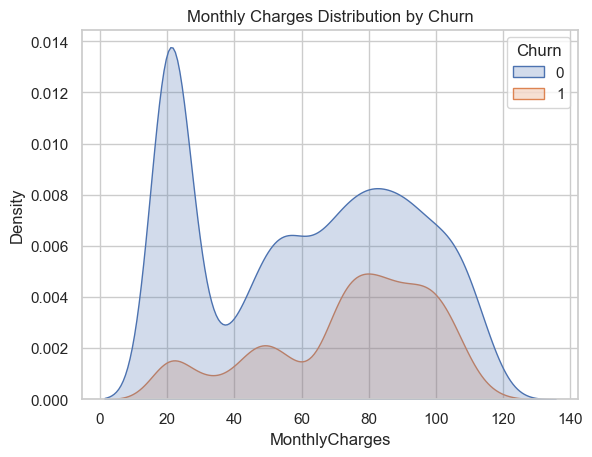

In [30]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


Higher charges → higher churn risk.

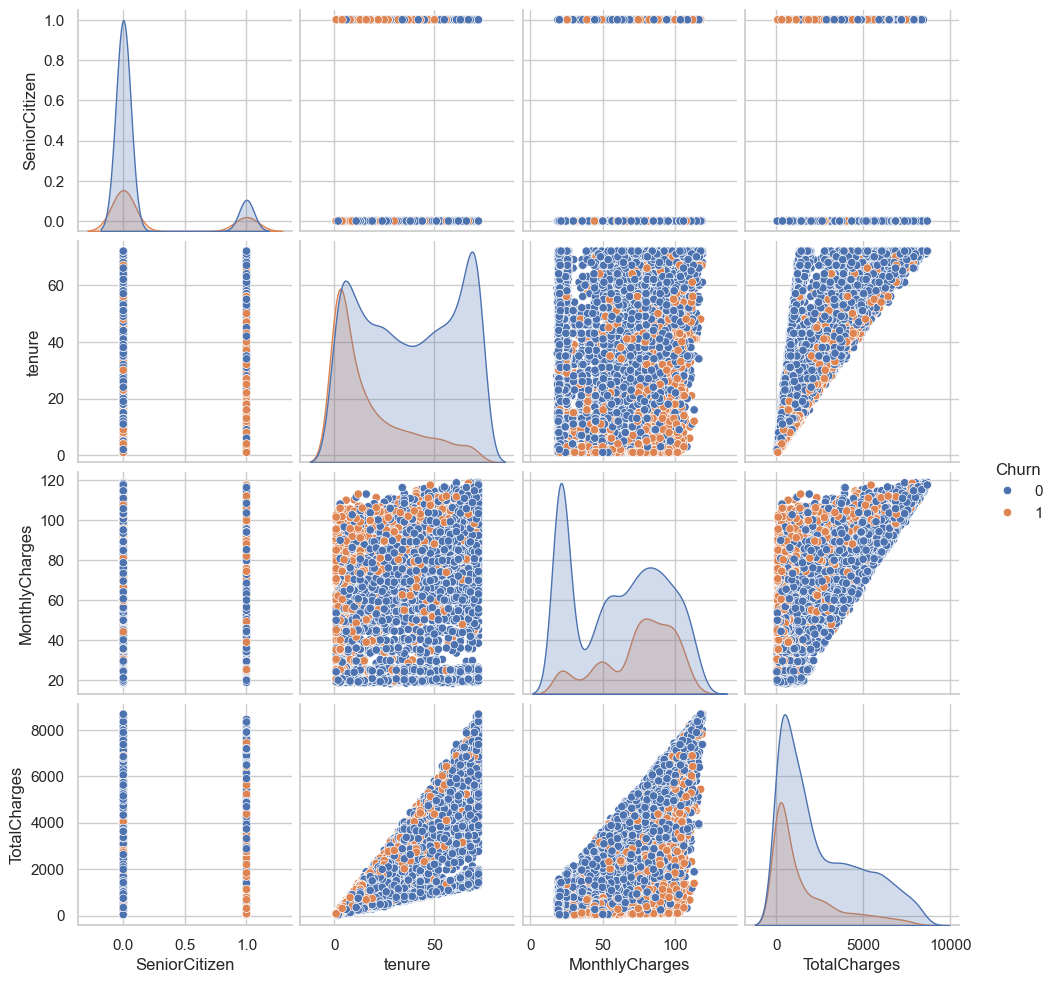

In [76]:
sns.pairplot(df.select_dtypes(include=['number']), hue='Churn')
plt.show()


The pairplot below visualizes the relationship between numerical variables and churn to identify interaction patterns and separability between churned and non-churned customers.

## 6. Correlation Analysis


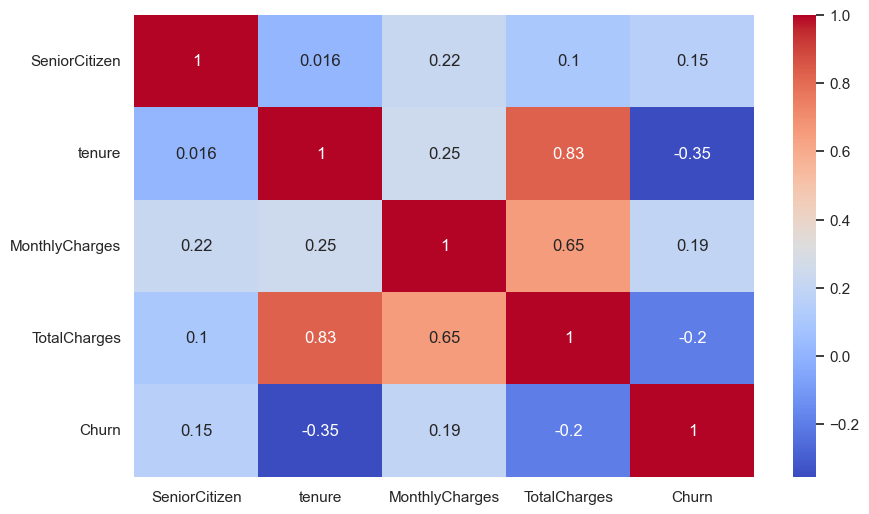

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), 
            annot=True, 
            cmap='coolwarm')
plt.show()


 1.Tenure shows strong negative correlation with Churn.
→ Customers with longer tenure are less likely to churn.

 2.MonthlyCharges show positive correlation with Churn.
→ Higher monthly charges increase churn probability.

3.TotalCharges has weak negative correlation with Churn.
→ Customers with higher total spending tend to stay longer.

 4.SeniorCitizen shows slight positive correlation with Churn.
→ Senior citizens may have slightly higher churn risk.

## 7. Segmentation


In [61]:
segment_analysis = df.groupby(['Contract','InternetService'])['Churn'].mean()*100
segment_analysis


Contract        InternetService
Month-to-month  DSL                32.215863
                Fiber optic        54.605263
                No                 18.893130
One year        DSL                 9.298246
                Fiber optic        19.294991
                No                  2.479339
Two year        DSL                 1.926164
                Fiber optic         7.226107
                No                  0.789889
Name: Churn, dtype: float64

Month-to-month + Fiber optic → Highest risk segment.

In [77]:
pd.crosstab([df['Contract'], df['InternetService']], 
            df['Churn'], 
            normalize='index')*100

Churn                                   0          1
Contract       InternetService                      
Month-to-month DSL              67.784137  32.215863
               Fiber optic      45.394737  54.605263
               No               81.106870  18.893130
One year       DSL              90.701754   9.298246
               Fiber optic      80.705009  19.294991
               No               97.520661   2.479339
Two year       DSL              98.073836   1.926164
               Fiber optic      92.773893   7.226107
               No               99.210111   0.789889

## 8. Risk Profiling


In [33]:
high_risk = df[
    (df['Contract']=="Month-to-month") &
    (df['tenure']<12) &
    (df['MonthlyCharges']>70)
]

print("High Risk Customers:", high_risk.shape[0])


High Risk Customers: 814


These customers:

1. Short tenure

2. Expensive plans

3. No long-term commitment

They need targeted retention.

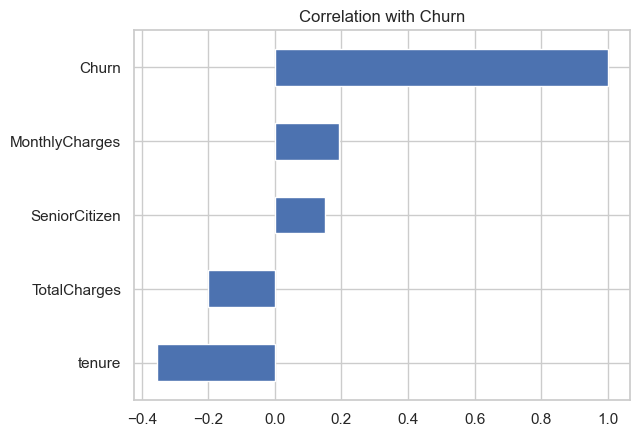

In [34]:
corr_target = df.select_dtypes(include=['number']).corr()['Churn'].sort_values()
corr_target.plot(kind='barh')
plt.title("Correlation with Churn")
plt.show()


1. Tenure negatively correlated

2. Monthly charges positively correlated

## 9. Business Recommendations

### Strategic Recommendations:

- Convert month-to-month customers to long-term contracts with discounts.
- Provide onboarding benefits during first year.
- Offer loyalty rewards after 12 months.
- Review pricing strategy for high monthly charge customers.
- Target high-risk segments with retention campaigns.
